In [221]:
import pandas as pd
import numpy as np

data=pd.read_excel('data.xlsx')

# 1. 数据探索

In [2]:
print(data.head())
print(data.shape)  # 数据行列数量

        Date     Open     High      Low    Close  Change(Pips)  Change(%)
0 2021-07-04  1787.22  1787.73  1785.00  1786.39           -83      -0.05
1 2021-07-05  1786.68  1794.00  1783.80  1791.15           447       0.25
2 2021-07-06  1790.85  1814.89  1789.89  1795.68           483       0.27
3 2021-07-07  1795.28  1809.50  1793.41  1803.22           794       0.44
4 2021-07-08  1803.29  1818.00  1793.90  1803.75            46       0.03
(622, 7)


In [3]:
print(data.info())
print(data.describe())#查看数据基本情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          622 non-null    datetime64[ns]
 1   Open          622 non-null    float64       
 2   High          622 non-null    float64       
 3   Low           622 non-null    float64       
 4   Close         622 non-null    float64       
 5   Change(Pips)  622 non-null    int64         
 6   Change(%)     622 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 34.1 KB
None
              Open         High          Low        Close  Change(Pips)  \
count   622.000000   622.000000   622.000000   622.000000    622.000000   
mean   1833.470354  1844.208939  1822.538248  1833.592749     12.239550   
std      94.417731    95.163303    93.223079    94.345885   1480.617616   
min    1627.270000  1640.760000  1615.040000  1626.890000  -5559.000000

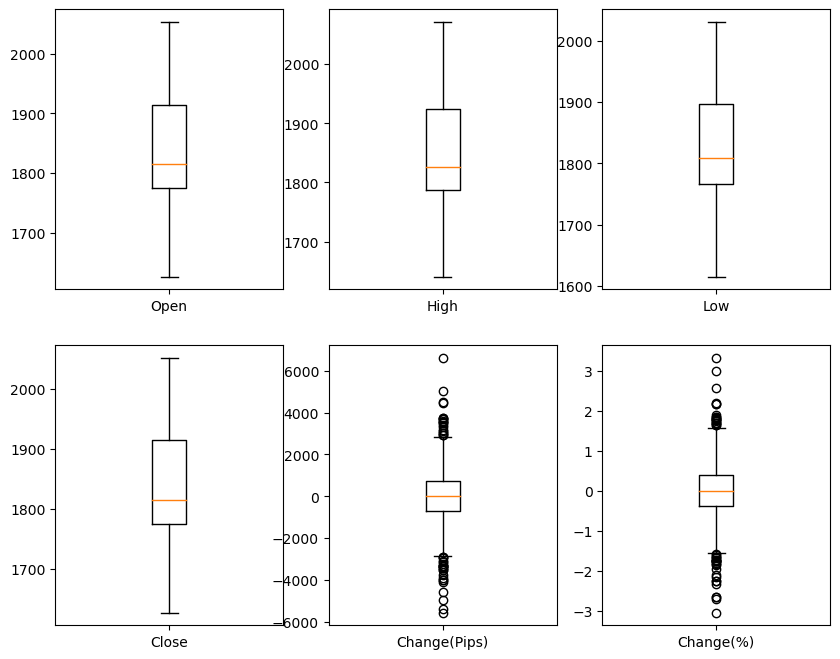

In [9]:
#绘制箱线图，查看六列数据大小集中的分布
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8),dpi=100)
plt.subplot(231)
plt.boxplot(data['Open'],labels=['Open'])
plt.subplot(232)
plt.boxplot(data['High'],labels=['High'])
plt.subplot(233)
plt.boxplot(data['Low'],labels=['Low'])
plt.subplot(234)
plt.boxplot(data['Close'],labels=['Close'])
plt.subplot(235)
plt.boxplot(data['Change(Pips)'],labels=['Change(Pips)'])
plt.subplot(236)
plt.boxplot(data['Change(%)'],labels=['Change(%)'])
plt.show()

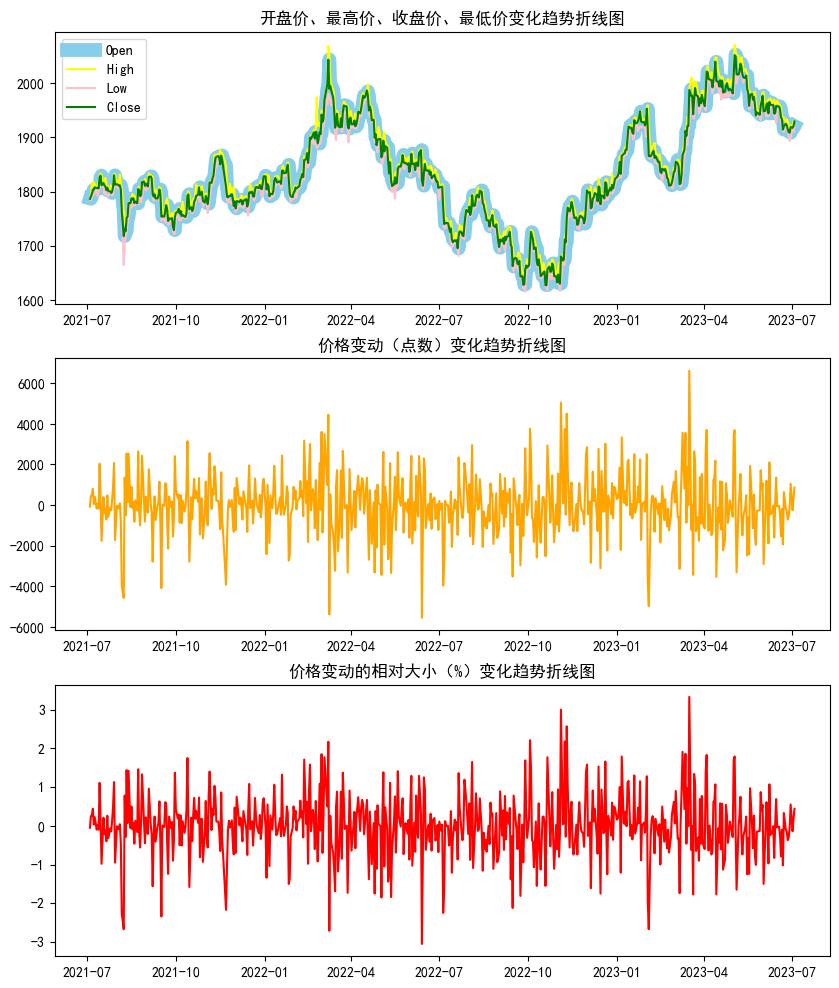

In [223]:
#绘制折线图，查看六列数据每日变化波动
plt.rcParams['font.sans-serif']=['Simhei'] #设置中文字体
plt.figure(figsize=(10,12),dpi=100)
plt.rcParams['axes.unicode_minus'] = False #设置y轴负号显示
x=data['Date']
plt.subplot(311)
y1=data['Open']
y2=data['High']
y3=data['Low']
y4=data['Close']
plt.plot(x,y1,color='skyblue',label='Open',linewidth=10) #由于开盘价（Open）与收盘价（Close）大量重合，为便于观察，加宽线条处理
plt.plot(x,y2,color='yellow',label='High')
plt.plot(x,y3,color='pink',label='Low')
plt.plot(x,y4,color='green',label='Close')
plt.title('开盘价、最高价、收盘价、最低价变化趋势折线图')
plt.legend()
plt.subplot(312)
y5=data['Change(Pips)']
plt.plot(x,y5,color='orange',label=['Change(Pips)'])

plt.title('价格变动（点数）变化趋势折线图')
plt.subplot(313)
y6=data['Change(%)']
plt.plot(x,y6,color='red',label=['Change(%)'])
plt.title('价格变动的相对大小（%）变化趋势折线图')
plt.show()

C:\Users\86158\AppData\Local\Temp\ipykernel_11924\1067533054.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = data.corr()


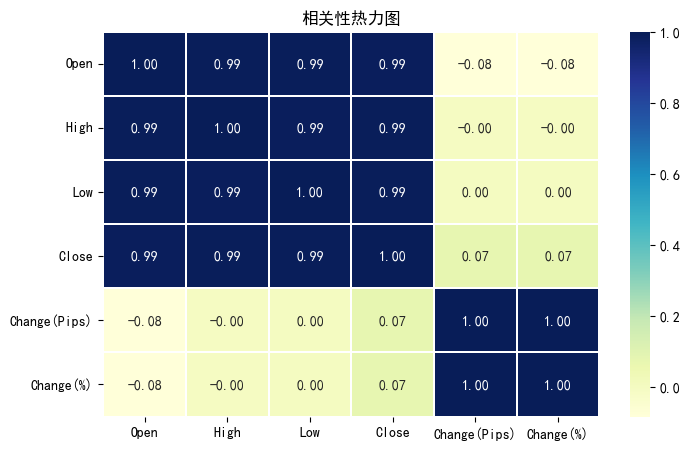

In [32]:
import seaborn as sns  
# 计算相关性
a = data.corr()

# 绘制相关性热力图
plt.figure(figsize=(8, 5))

sns.heatmap(a, annot=True, cmap="YlGnBu", linewidths=0.2, fmt='.2f')
plt.title('相关性热力图')
plt.show()

# 数据预处理

In [33]:
#查看缺失值
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Change(Pips)    0
Change(%)       0
dtype: int64

<Axes: >

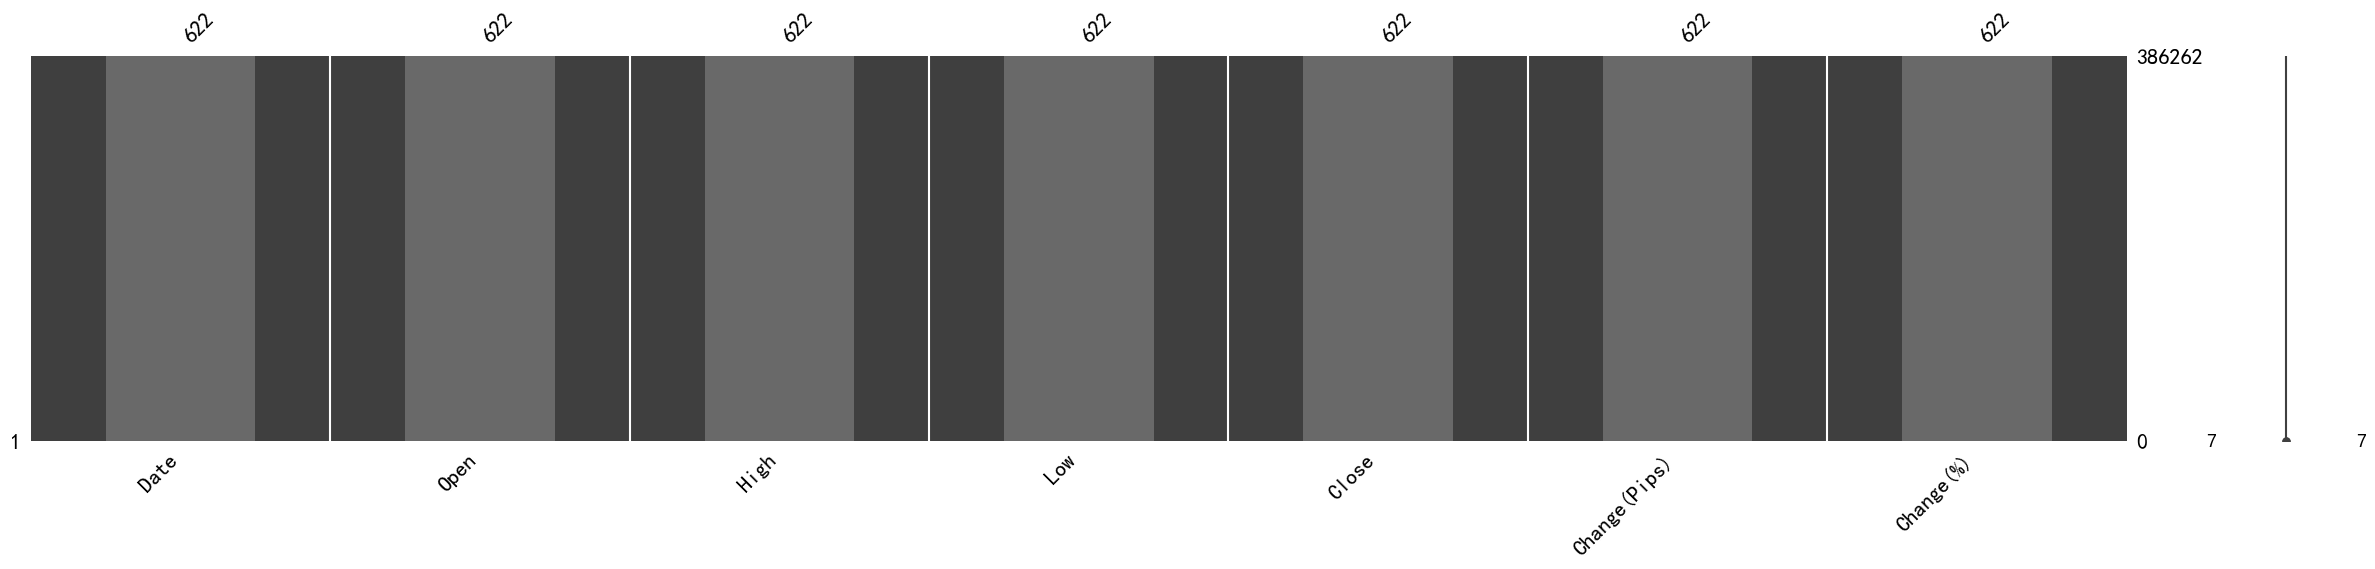

In [37]:
# 将数据缺失情况使用进行可视化展示
import missingno
missingno.matrix(data,figsize=(30,5)) #以矩阵的形式

#以条形图的方式查看
missingno.bar(data,sort='ascending',figsize=(30,5))

In [248]:
#查看异常值
#Change(Pips)公式为 Change(Pips)=（Close-Open）*100
data['new_Change(Pips)'] = (data['Close'] - data['Open'])*100
data['new_Change(Pips)'] = data['new_Change(Pips)'].astype('int64')
bool_values = (data['new_Change(Pips)'] == data['Change(Pips)'])
#print(bool_values)

#使用列表推导式提取为 False 的数据的索引  
false_indices = [index for index, value in enumerate(bool_values) if value is False]  
print(false_indices) #提取出异常值

#将正确值进行替换
data['Change(Pips)'] = data['new_Change(Pips)']

[]


In [251]:
#Change(%)公式为Change(%)=（Close-Open）/Open*100
data['new_Change(%)'] = (data['Close'] - data['Open'])/data['Open']*100
data['new_Change(%)'] = [round(x, 2) for x in data['new_Change(%)']] #保留两位小数
#print(data)
bool_list = (data['new_Change(%)'] == data['Change(%)'])
#print(bool_list)
#使用列表推导式提取为 False 的数据的索引  
false_indices1 = [index for index, value in enumerate(bool_list) if value is False]  
print(false_indices1) #提取出异常值

#将正确值进行替换
data['Change(%)'] = data['new_Change(%)']
print(data)

[]
          Date     Open     High      Low    Close  Change(Pips)  Change(%)  \
0   2021-07-04  1787.22  1787.73  1785.00  1786.39           -82      -0.05   
1   2021-07-05  1786.68  1794.00  1783.80  1791.15           447       0.25   
2   2021-07-06  1790.85  1814.89  1789.89  1795.68           483       0.27   
3   2021-07-07  1795.28  1809.50  1793.41  1803.22           794       0.44   
4   2021-07-08  1803.29  1818.00  1793.90  1803.75            46       0.03   
..         ...      ...      ...      ...      ...           ...        ...   
617 2023-06-29  1909.47  1913.00  1893.16  1908.76           -71      -0.04   
618 2023-06-30  1908.71  1922.61  1900.57  1919.20          1049       0.55   
619 2023-07-02  1920.30  1920.30  1917.50  1917.70          -259      -0.14   
620 2023-07-03  1917.70  1930.50  1910.11  1921.17           347       0.18   
621 2023-07-04  1921.07  1930.22  1920.34  1929.65           858       0.45   

     new_Change(Pips)  new_Change(%)  
0        

In [89]:
#查看重复值
bool_list1=data.duplicated()
false_indices2=[index for index, value in enumerate(bool_list1) if value is True]
print(false_indices2)#列表为空，无重复值

[]


In [255]:
new_data=data.iloc[:,:-2]
new_data.to_excel('D:/学校/sai/2023年第二届全国大学生数据分析实践赛章程赛题(3)(1)/2023年B题/new_data.xlsx', index=False)